# 0.0 IMPORTS

In [1]:


import seaborn  as sns
import pandas   as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


# 0.2 Loading Data

In [6]:
df_agua_parada_raw = pd.read_csv("tb_agua_parada_202404271101.csv", low_memory=False)
df_casos_dengue_raw = pd.read_csv("tb_casos_dengue_202404271102.csv", low_memory=False)
df_condicoes_climaticas_raw = pd.read_csv("tb_condicoes_climaticas_202404271103.csv", low_memory=False)
df_condicoes_conscientizacao_raw = pd.read_csv("tb_conscientizacao_202404271103.csv", low_memory=False)
df_condicoes_falta_higiene_raw = pd.read_csv("tb_falta_higiene_202404271103.csv", low_memory=False)
df_condicoes_fato_raw = pd.read_csv("tb_fato_202404271104.csv", low_memory=False)

#df_dataset_raw=pd.read_csv("/content/drive/MyDrive/hack_8_data/dataset.csv", low_memory=False)

#df_store_raw=pd.read_csv("/content/drive/MyDrive/dataset/store.csv", low_memory=False)


In [8]:
df_condicoes_conscientizacao_raw.sample() #id	status,
# parece que esta tabel nao será útil
df_condicoes_conscientizacao_raw.shape #(10, 2)

(10, 1)

In [10]:
# objectivo : Previsão de casos de dengue
# objetivo é prever o número de casos dos próximos 1500 dias disponíveis no banco de dados.
df_casos_dengue_raw.sample() #Date	Casos de dengue
df_casos_dengue_raw.shape #(12014, 2)

(12014, 1)

In [12]:
df_agua_parada_raw.sample() #Date	Presença de Criadouros	Água Parada em Terrenos Baldios	Presença de Piscinas sem Manutenção	Presença de Recipientes sem Tampas
df_agua_parada_raw.shape #(13514, 5)

(13514, 1)

In [ ]:
df_condicoes_climaticas_raw.sample() #Date	Precipitação	Umidade	Temperatura
df_condicoes_climaticas_raw.shape #(13514, 4)

(13514, 4)

In [ ]:
df_condicoes_falta_higiene_raw.sample() #Date	Falta de Coleta de Lixo	Áreas com Acúmulo de Entulhos	Falta de Controle de Pragas	Taxa de Tratamento de Esgoto
df_condicoes_falta_higiene_raw.shape #(13514, 5)

(13514, 5)

In [ ]:
df_condicoes_fato_raw.sample() # Date	conscientização da população	condições de moradia precárias	falta de acesso a serviços de saúde	migração de pessoas de áreas endêmicas	transporte de mercadorias em áreas urbanas	outros	presença do mosquito
df_condicoes_fato_raw.shape #(13514, 8)

(13514, 8)

In [ ]:
df_raw=pd.merge(df_condicoes_fato_raw, df_condicoes_falta_higiene_raw, how='left', on='Date') #1001599 rows × 19 columns

In [ ]:
df_raw.shape #(13514, 12)

(13514, 12)

In [ ]:
df_raw=pd.merge(df_raw, df_condicoes_climaticas_raw, how='left', on='Date') #1001599 rows × 19 columns

In [ ]:
df_raw.shape #(13514, 15) (13514, 12),

(13514, 15)

In [ ]:
df_raw=pd.merge(df_raw, df_agua_parada_raw, how='left', on='Date') #1001599 rows × 19 columns
df_raw.shape #(13514, 19) (13514, 15) (13514, 12),

(13514, 19)

In [ ]:
df_raw_1=pd.merge(df_casos_dengue_raw, df_raw, how='left', on='Date') #1001599 rows × 19 columns
df_raw_1.shape #(12014, 20) (13514, 19) (13514, 15) (13514, 12),

(12014, 20)

In [ ]:
df_casos_dengue_raw.shape #(12014, 2)

(12014, 2)

In [ ]:
# quais tabelas vamos juntar, e em quais colunas?
(13514-12014)/13514

0.11099600414385082

In [ ]:
(13514-12014)/13514*100

11.099600414385081

In [ ]:
df_raw_2=pd.merge(df_raw, df_casos_dengue_raw, how='left', on='Date') #1001599 rows × 19 columns
df_raw_2.shape #(13514, 20) (13514, 19) (13514, 15) (13514, 12),

(13514, 20)

In [ ]:
df_dataset_raw.shape #(13514, 20)

(13514, 20)

# 1.0. PASSO 01 - DESCRIÇÃO DOS DADOS

In [ ]:
df_dataset_raw=pd.read_csv("/content/drive/MyDrive/hack_8_data/dataset.csv", low_memory=False)

In [ ]:
df1 = df_dataset_raw

In [ ]:
# fazendo uma copia da seccao anterior
df1=df_raw_2.copy()
df1.sample()
#list(df1.columns)

,Date,conscientização da população,condições de moradia precárias,falta de acesso a serviços de saúde,migração de pessoas de áreas endêmicas,transporte de mercadorias em áreas urbanas,outros,presença do mosquito,Falta de Coleta de Lixo,Áreas com Acúmulo de Entulhos,Falta de Controle de Pragas,Taxa de Tratamento de Esgoto,Precipitação,Umidade,Temperatura,Presença de Criadouros,Água Parada em Terrenos Baldios,Presença de Piscinas sem Manutenção,Presença de Recipientes sem Tampas,Casos de dengue
7660,2007-12-22,1,"0,462339177891951","0,3154912999198740","0,5457271517155180","0,458778692538086","0,2152757376578130",264779,"0,0777961168104323","0,2042129013446050","0,0549373081872973","0,9500000000000000",NaN,"61,1975080819","28,4382385366","0,5424865662321250","0,3199491214913070",3216,34797,103272.0


In [ ]:
df_dataset_raw.sample()

,date,conscientizacao_populacao,condicoes_moradia_precarias,falta_acesso_servicos_saude,migracao_pessoas_areas_endemicas,transporte_mercadorias_areas_urbanas,outros,presenca_mosquito,presenca_criadouros,agua_parada_terreno_baldios,presenca_piscina_ sem_manutencao,presenca_recipientes_sem_tampas,precipitacao,umidade,temperatura,falta_coleta_lixo,areas_com_acumulo_entulhos,falta_controle_pragas,taxa_tratamento_esgoto,casos_dengue
129,5/10/1987,2,0.426566,0.366042,0.426765,0.432447,0.590571,29835.0,0.103534,0.299219,1797.0,43371.0,11.293823,52.529825,29.757462,0.346101,0.607819,0.298644,0.430001,1238.0


In [ ]:
df1=df_dataset_raw.copy()
df1.sample()

,date,conscientizacao_populacao,condicoes_moradia_precarias,falta_acesso_servicos_saude,migracao_pessoas_areas_endemicas,transporte_mercadorias_areas_urbanas,outros,presenca_mosquito,presenca_criadouros,agua_parada_terreno_baldios,presenca_piscina_ sem_manutencao,presenca_recipientes_sem_tampas,precipitacao,umidade,temperatura,falta_coleta_lixo,areas_com_acumulo_entulhos,falta_controle_pragas,taxa_tratamento_esgoto,casos_dengue
3381,4/2/1996,2,0.45075,0.224805,0.264161,0.461518,0.2297,19846.0,0.527199,0.686279,4746.0,96329.0,97.133764,71.681718,20.036377,0.419102,0.297951,0.075729,0.747021,1027.0


## 1.1 Rename Columns

In [ ]:
#quais a colunas a seram alteradas
#cols_old=list(df1.columns)
#cols_old #.list()

In [ ]:
#!pip install inflection==0.5.1
#import inflection
#snakecase = lambda x: inflection.underscore(x)
#mapeando a função
#cols_new = list(map(snakecase, cols_old))
#rename
#df1.columns=cols_new

In [ ]:
df1.sample()


,date,conscientizacao_populacao,condicoes_moradia_precarias,falta_acesso_servicos_saude,migracao_pessoas_areas_endemicas,transporte_mercadorias_areas_urbanas,outros,presenca_mosquito,presenca_criadouros,agua_parada_terreno_baldios,presenca_piscina_ sem_manutencao,presenca_recipientes_sem_tampas,precipitacao,umidade,temperatura,falta_coleta_lixo,areas_com_acumulo_entulhos,falta_controle_pragas,taxa_tratamento_esgoto,casos_dengue
5276,6/9/2001,2,0.10061,0.09944,NaN,0.291529,0.244552,12718.0,0.558699,0.259653,1694.0,74649.0,34.770437,61.652789,16.953038,0.378161,0.307996,0.373045,0.905108,233.0


## 1.2 Data Dimensions

## 1.3 Data Types

In [ ]:
df1.dtypes


date                                     object
conscientizacao_populacao                 int64
condicoes_moradia_precarias             float64
falta_acesso_servicos_saude             float64
migracao_pessoas_areas_endemicas        float64
transporte_mercadorias_areas_urbanas    float64
outros                                  float64
presenca_mosquito                       float64
presenca_criadouros                     float64
agua_parada_terreno_baldios             float64
presenca_piscina_ sem_manutencao        float64
presenca_recipientes_sem_tampas         float64
precipitacao                            float64
umidade                                 float64
temperatura                             float64
falta_coleta_lixo                       float64
areas_com_acumulo_entulhos              float64
falta_controle_pragas                   float64
taxa_tratamento_esgoto                  float64
casos_dengue                            float64
dtype: object

In [ ]:
#convertendo a date from object to
df1['date']=pd.to_datetime(df1['date'])

In [ ]:
df1.dtypes

date                                    datetime64[ns]
conscientizacao_populacao                        int64
condicoes_moradia_precarias                    float64
falta_acesso_servicos_saude                    float64
migracao_pessoas_areas_endemicas               float64
transporte_mercadorias_areas_urbanas           float64
outros                                         float64
presenca_mosquito                              float64
presenca_criadouros                            float64
agua_parada_terreno_baldios                    float64
presenca_piscina_ sem_manutencao               float64
presenca_recipientes_sem_tampas                float64
precipitacao                                   float64
umidade                                        float64
temperatura                                    float64
falta_coleta_lixo                              float64
areas_com_acumulo_entulhos                     float64
falta_controle_pragas                          float64
taxa_trata

## 1.4 Check NA

In [ ]:
# verificando se temos dados nulos
df1.isna().sum()

date                                       0
conscientizacao_populacao                  0
condicoes_moradia_precarias              142
falta_acesso_servicos_saude              172
migracao_pessoas_areas_endemicas         148
transporte_mercadorias_areas_urbanas     145
outros                                   135
presenca_mosquito                        127
presenca_criadouros                      138
agua_parada_terreno_baldios              146
presenca_piscina_ sem_manutencao         125
presenca_recipientes_sem_tampas          150
precipitacao                             136
umidade                                  146
temperatura                              145
falta_coleta_lixo                        139
areas_com_acumulo_entulhos               126
falta_controle_pragas                    141
taxa_tratamento_esgoto                   156
casos_dengue                            1500
dtype: int64

## 1.5 Fillout NA

In [ ]:
df1.sample().T


,6232
date,2004-01-23 00:00:00
conscientizacao_populacao,2
condicoes_moradia_precarias,0.419808
falta_acesso_servicos_saude,0.067158
migracao_pessoas_areas_endemicas,0.129945
transporte_mercadorias_areas_urbanas,0.593964
outros,0.443718
presenca_mosquito,703338.0
presenca_criadouros,0.523521
agua_parada_terreno_baldios,0.1485


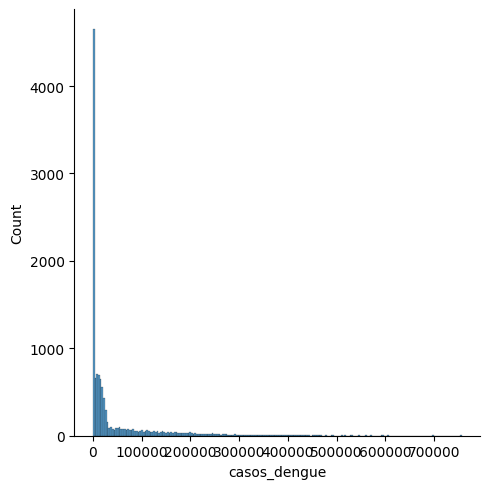

In [ ]:

sns.displot(df1['casos_dengue'])

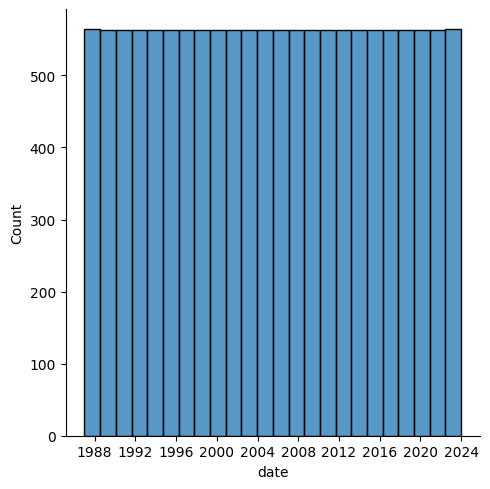

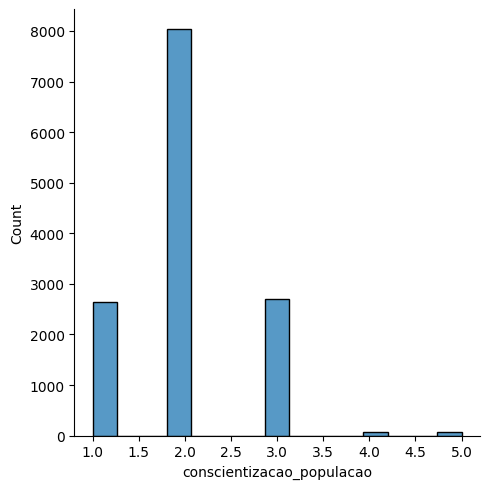

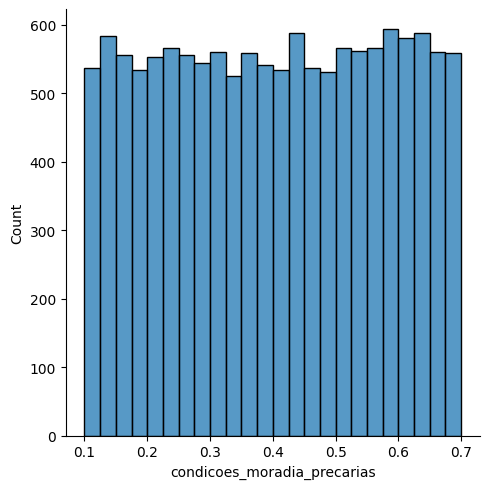

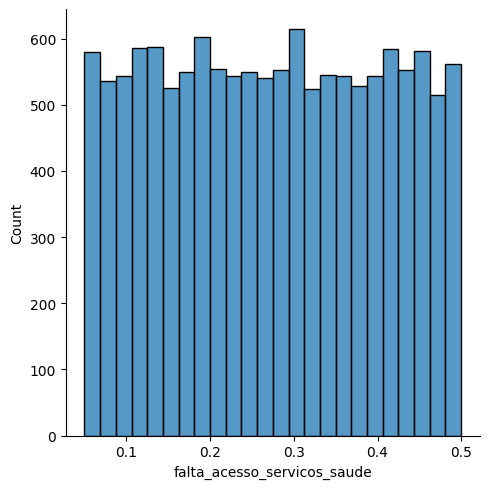

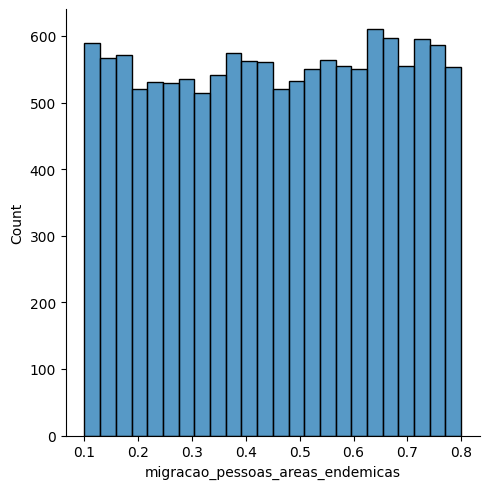

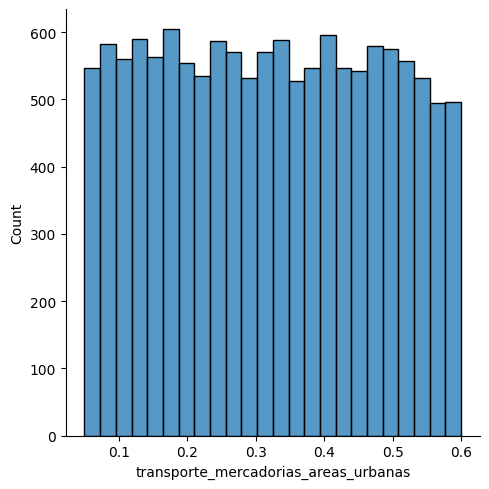

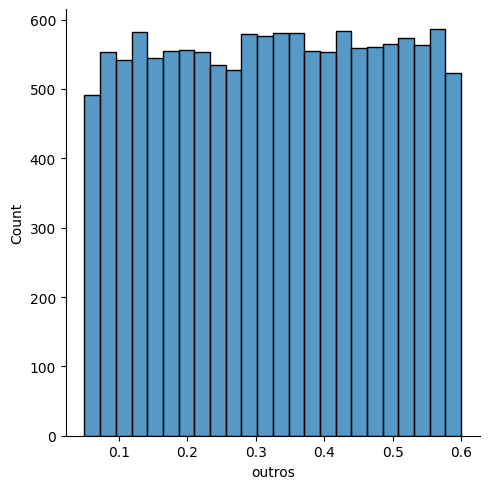

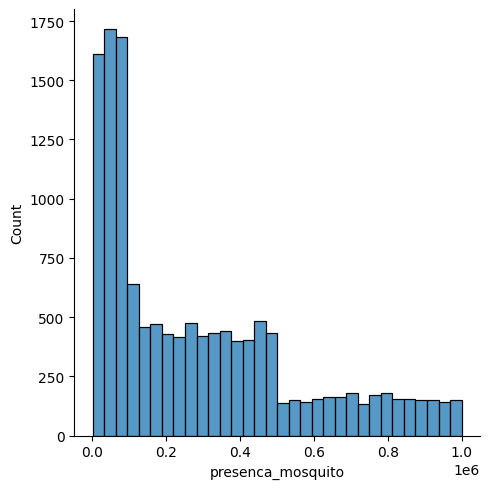

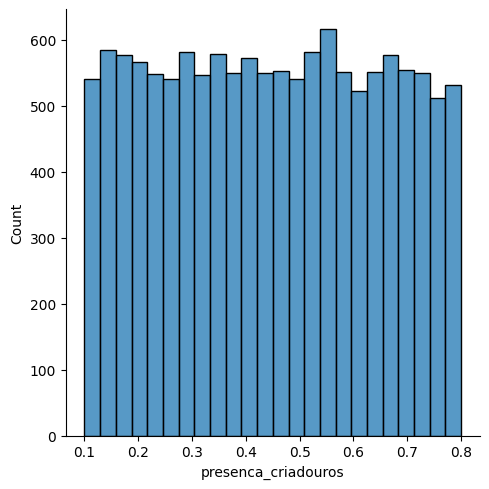

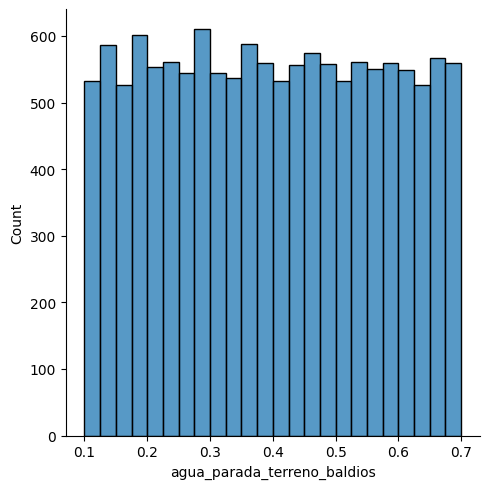

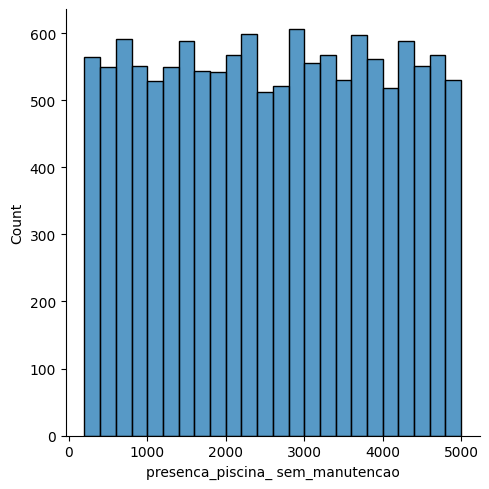

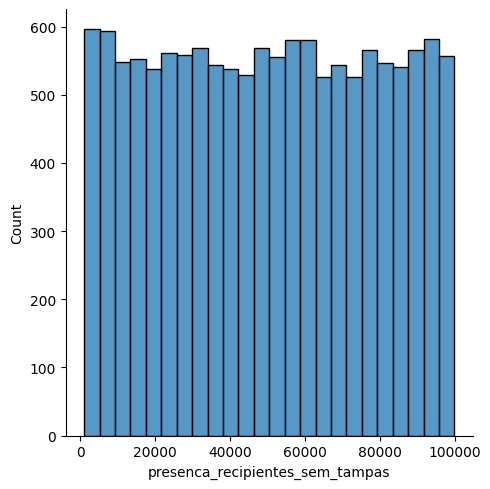

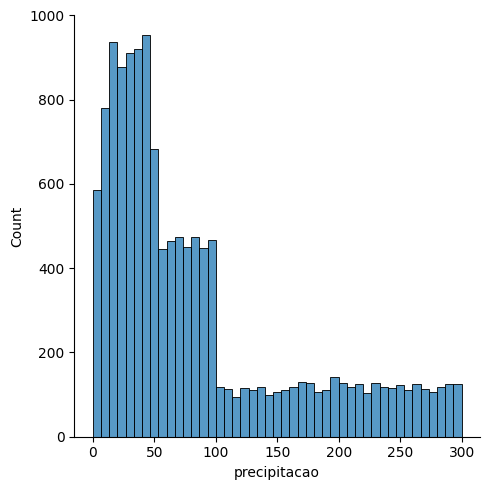

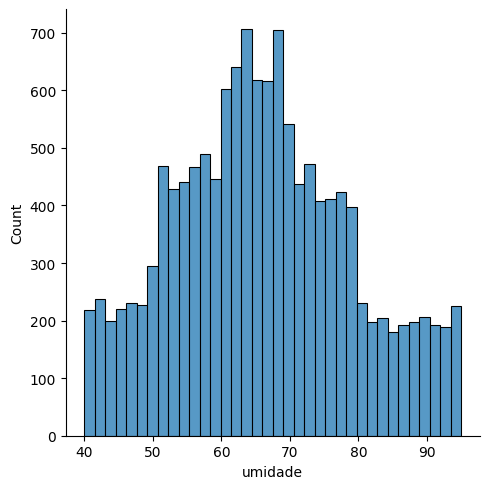

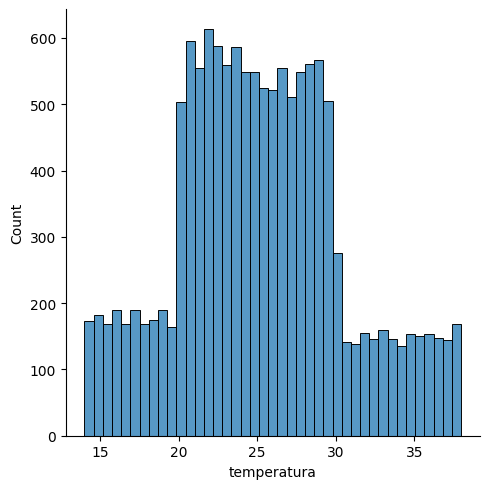

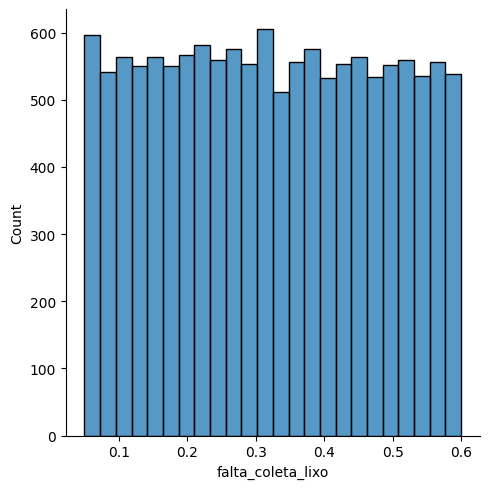

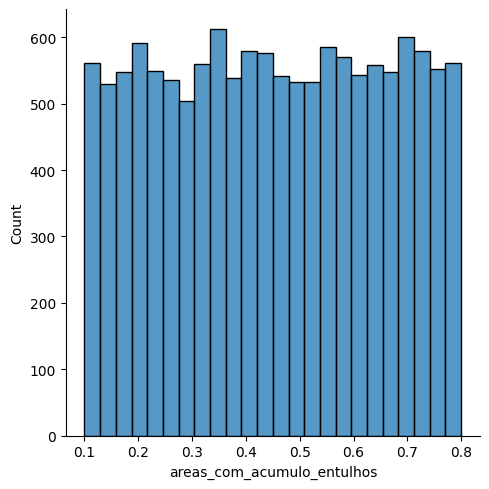

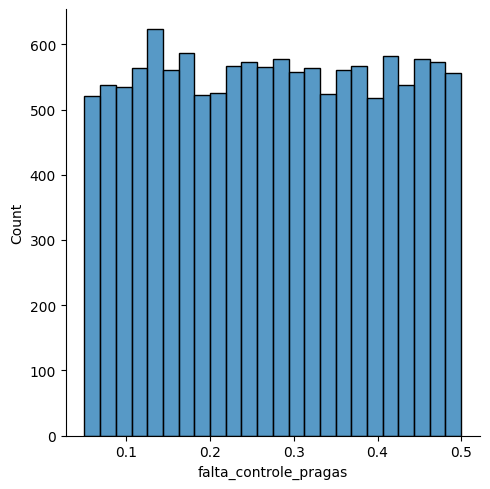

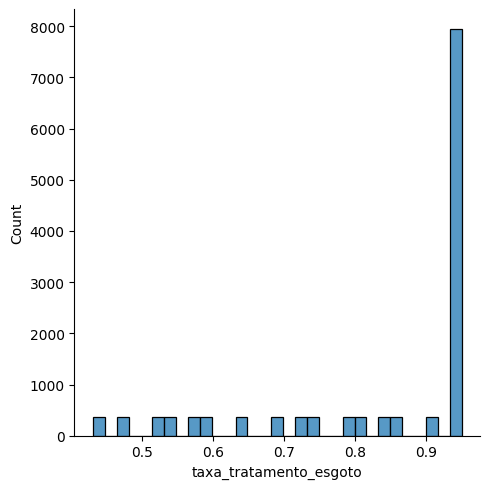

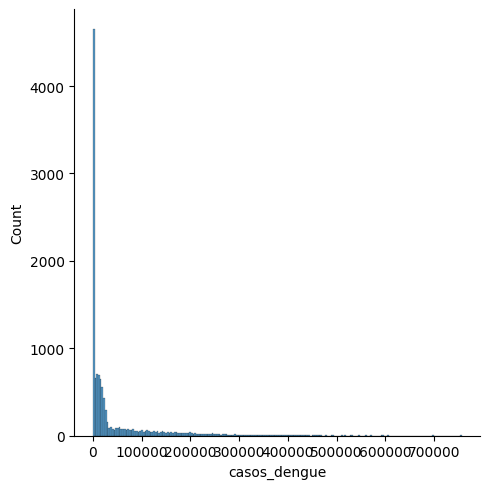

In [ ]:
cols=list(df1.columns)
#cols
for i in cols:
  sns.displot(df1[i])

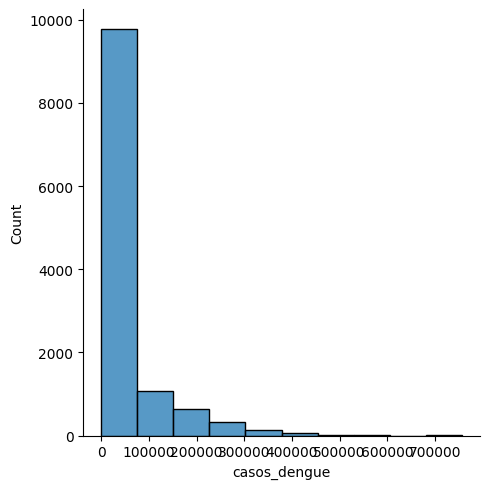

In [ ]:
sns.displot(df1['casos_dengue'], bins=10)

<Axes: xlabel='conscientizacao_populacao', ylabel='casos_dengue'>

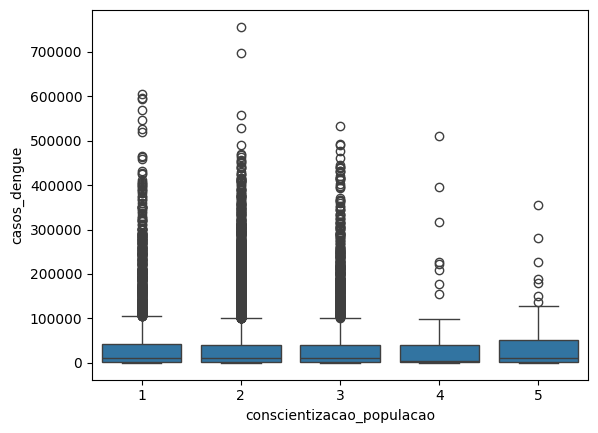

In [ ]:
#como estao distribuidas as variveis
#aux1=df1[(df1['casos_dengue']!=0)]# & (df1['sales']>0)]
sns.boxplot(x='conscientizacao_populacao', y='casos_dengue', data=df1)

<Axes: xlabel='taxa_tratamento_esgoto', ylabel='casos_dengue'>

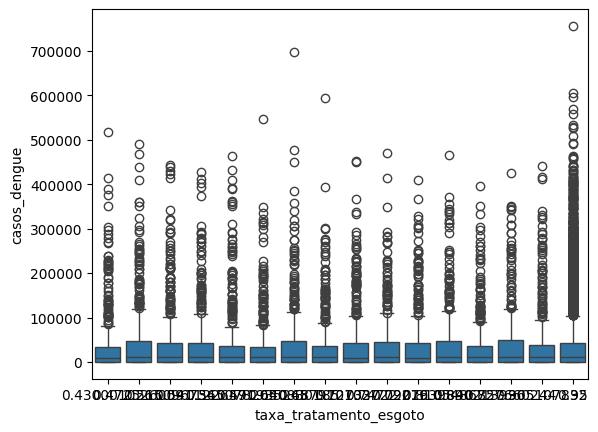

In [ ]:
sns.boxplot(x='taxa_tratamento_esgoto', y='casos_dengue', data=df1)

In [ ]:
df2=df1.copy()

In [ ]:
sub_mediana=['presenca_mosquito','precipitacao','taxa_tratamento_esgoto','casos_dengue']
for i in sub_mediana:
  mediana=df2[i].median()
  df2[i].fillna(mediana, inplace=True)

In [ ]:
sub_media=['condicoes_moradia_precarias','falta_acesso_servicos_saude','migracao_pessoas_areas_endemicas','transporte_mercadorias_areas_urbanas','outros','presenca_criadouros','agua_parada_terreno_baldios','presenca_piscina_ sem_manutencao','presenca_recipientes_sem_tampas','umidade','temperatura','falta_coleta_lixo','areas_com_acumulo_entulhos','falta_controle_pragas']
for i in sub_media:
  media=df2[i].mean()
  df2[i].fillna(media, inplace=True) # fazendo modificação directa na coluna

In [ ]:
df2.isna().sum()

date                                    0
conscientizacao_populacao               0
condicoes_moradia_precarias             0
falta_acesso_servicos_saude             0
migracao_pessoas_areas_endemicas        0
transporte_mercadorias_areas_urbanas    0
outros                                  0
presenca_mosquito                       0
presenca_criadouros                     0
agua_parada_terreno_baldios             0
presenca_piscina_ sem_manutencao        0
presenca_recipientes_sem_tampas         0
precipitacao                            0
umidade                                 0
temperatura                             0
falta_coleta_lixo                       0
areas_com_acumulo_entulhos              0
falta_controle_pragas                   0
taxa_tratamento_esgoto                  0
casos_dengue                            0
dtype: int64

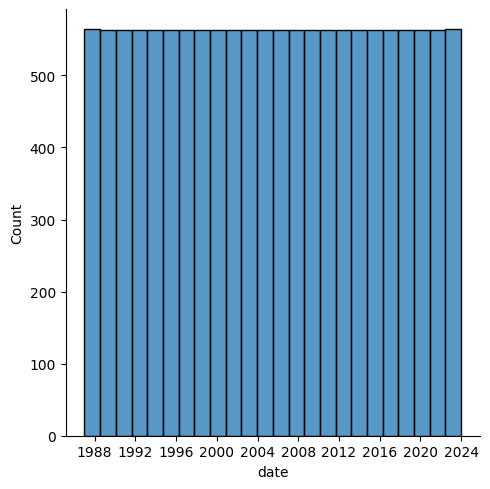

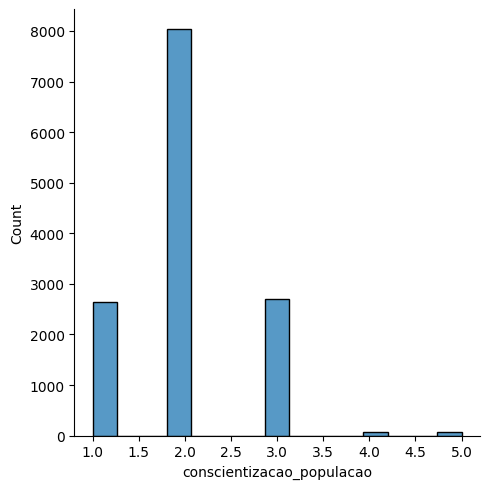

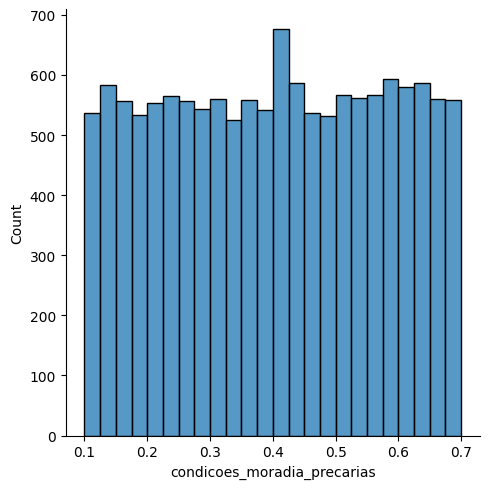

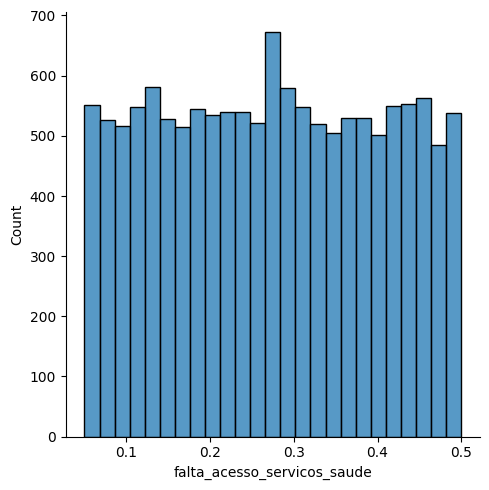

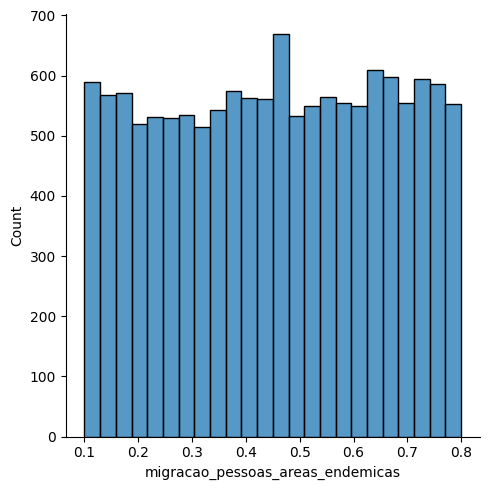

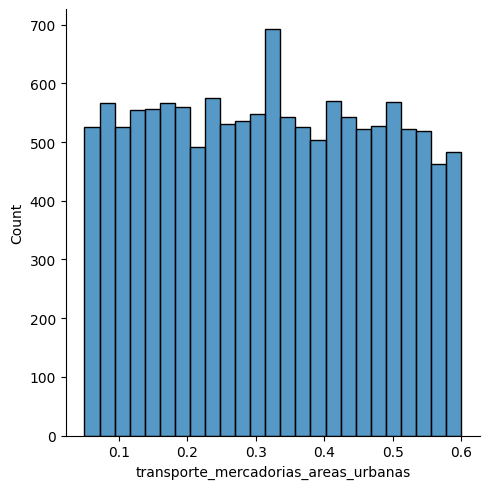

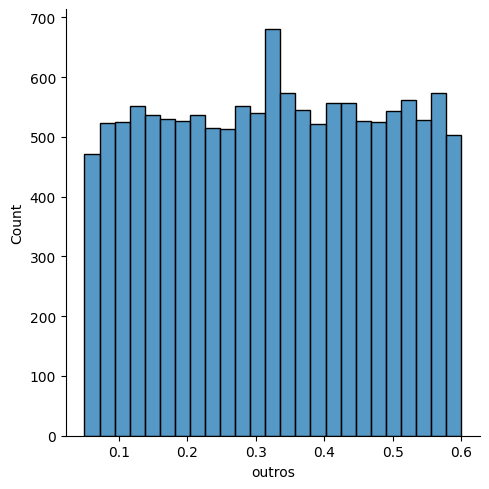

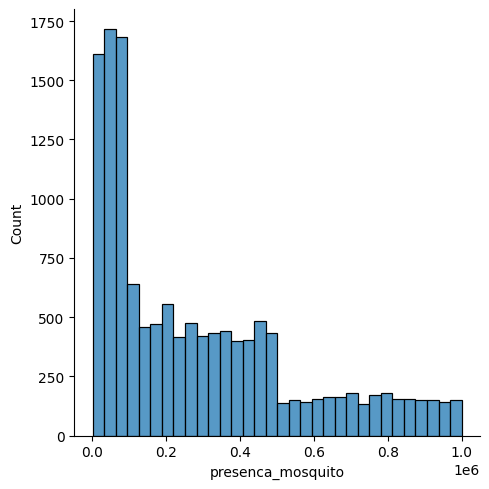

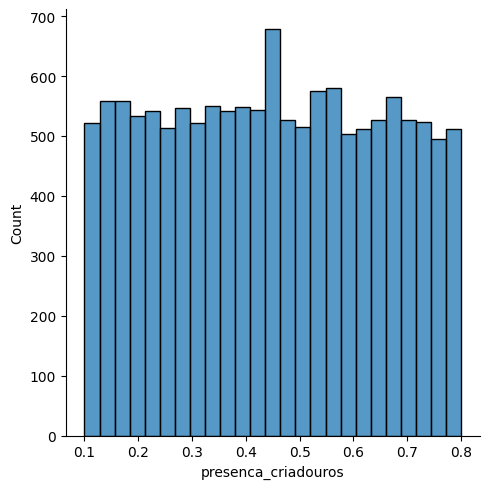

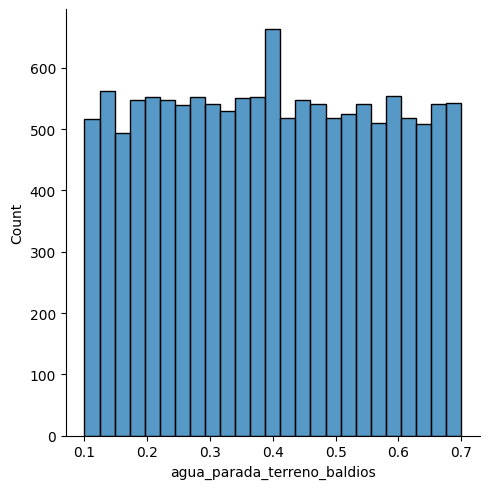

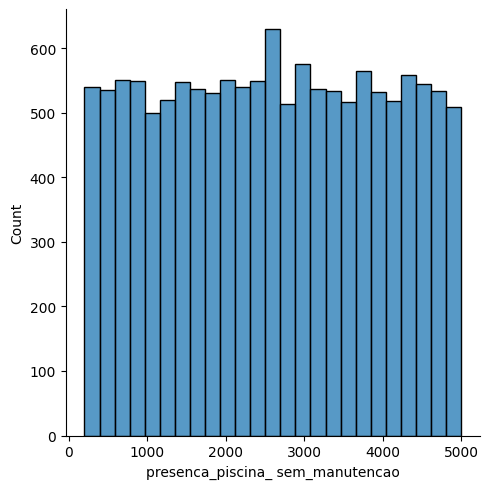

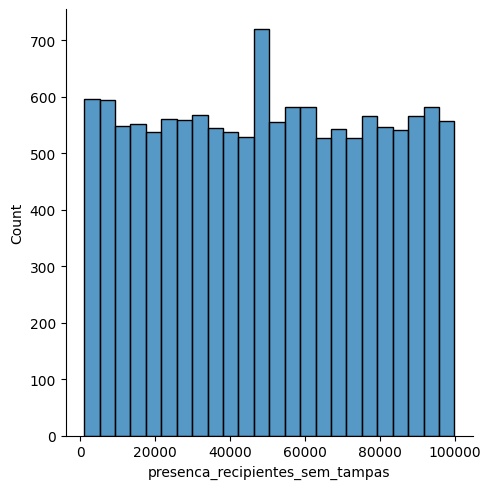

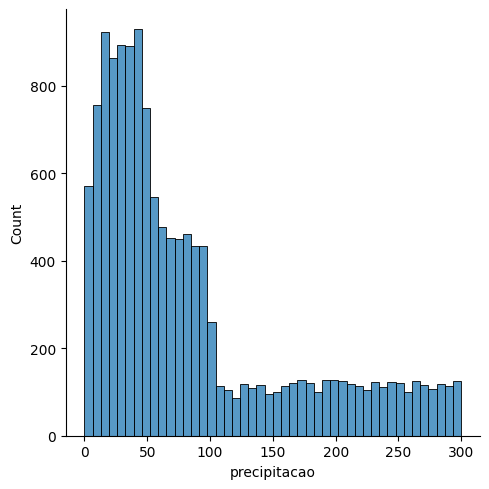

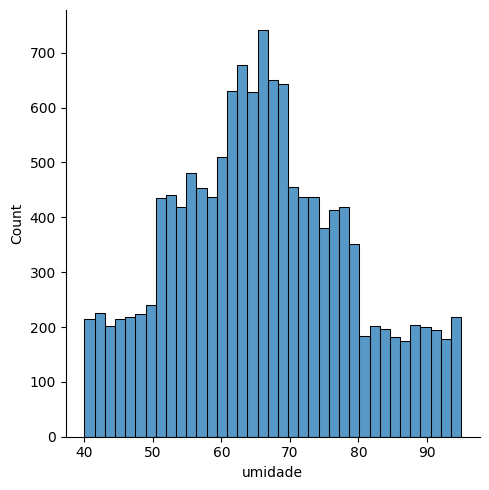

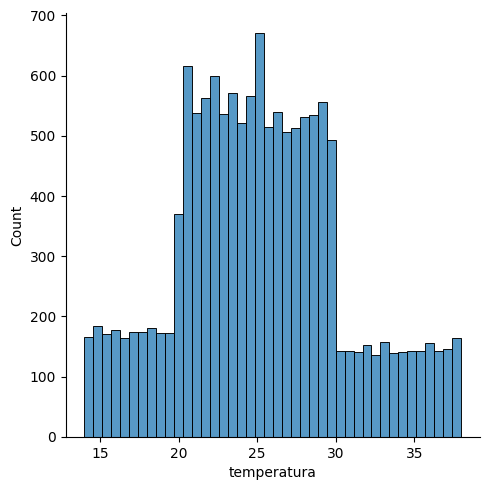

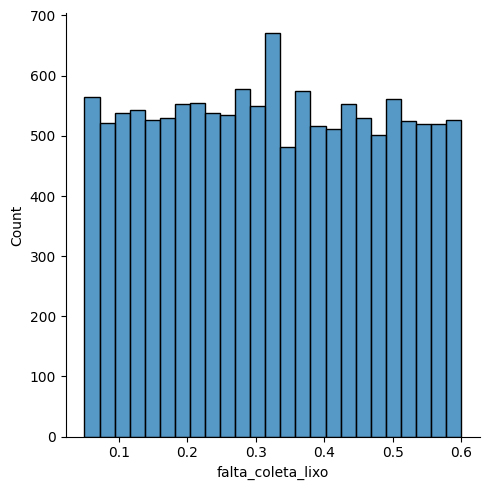

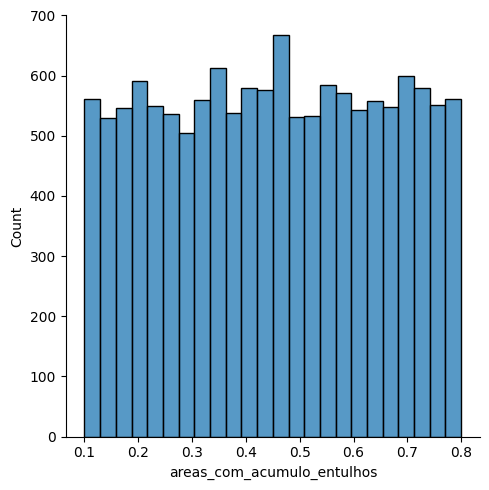

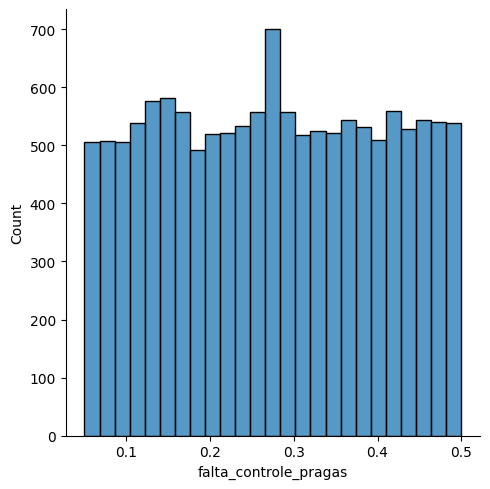

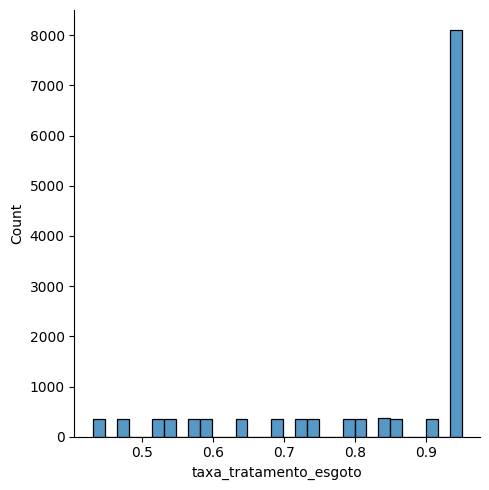

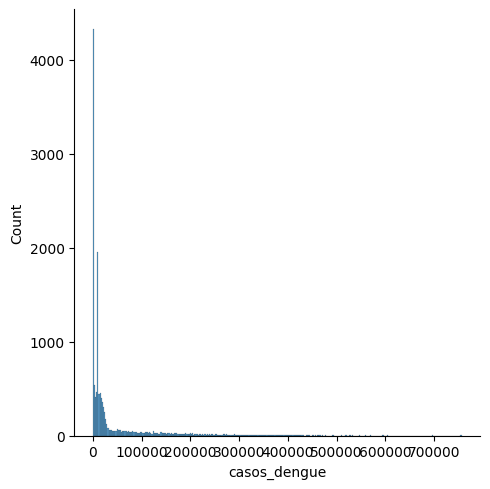

In [ ]:
cols=list(df2.columns)
#cols
for i in cols:
  sns.displot(df2[i])

## 1.6 Check Type

In [ ]:
cols_to_int=['presenca_mosquito','presenca_piscina_ sem_manutencao','presenca_recipientes_sem_tampas','casos_dengue']
#convertendo de float64 to int
for i in cols_to_int:
  df2[i]=df2[i].astype(int) #pd.to_datetime(df1[i])

In [ ]:
df2.dtypes

date                                    datetime64[ns]
conscientizacao_populacao                        int64
condicoes_moradia_precarias                    float64
falta_acesso_servicos_saude                    float64
migracao_pessoas_areas_endemicas               float64
transporte_mercadorias_areas_urbanas           float64
outros                                         float64
presenca_mosquito                                int64
presenca_criadouros                            float64
agua_parada_terreno_baldios                    float64
presenca_piscina_ sem_manutencao                 int64
presenca_recipientes_sem_tampas                  int64
precipitacao                                   float64
umidade                                        float64
temperatura                                    float64
falta_coleta_lixo                              float64
areas_com_acumulo_entulhos                     float64
falta_controle_pragas                          float64
taxa_trata

# 2.0. PASSO 02 - FEATURE ENGINEERING


## Na tabela de 'Casos de dengue', as últimas 1500 linhas não apresentam o número de casos. Seu trabalho é prever o total de casos para cada dia.

H1: date

## 1.1 Para dias mais afastado deveriam ter maior numero de casos de dengue (Maior casos de dengue )

H2: conscientizacao_populacao

2.1 Quanto menor o nivel de conscientizacao menor o numero de caso de dengue

H3: falta_acesso_servicos_saude

3.1 Quanto maior a falta de acesso ao servicos de saude maior sao os casos de dengue

### H4: migracao_pessoas_areas_endemicas


4.1 Quanto maior a migração de pessoas de areas endemicas maior o numero de casos de dengue

## H5: transporte_mercadorias_areas_urbanas

5.1 Quanto maior o transporte de mercadores a areas urbanas maior o numero de caso de dengue

### H6: presenca_mosquito

6.1 Quanto maior a presença de mosquito maior o numero de casos de dengue

H7: presenca_criadouros

7.1 Quanto maior a presença de criadouros maior o numero de caso de dengue

### H8: agua_parada_terreno_baldios

8.1 Quanto mais locais com agua parada em terreno baldios maior o numero de casos de dengue

H9:presenca_piscina_ sem_manutencao

9.1 Quanto maior o numero de

## 2.3. Feature Engineeringn

In [ ]:
df2.sample()

,date,conscientizacao_populacao,condicoes_moradia_precarias,falta_acesso_servicos_saude,migracao_pessoas_areas_endemicas,transporte_mercadorias_areas_urbanas,outros,presenca_mosquito,presenca_criadouros,agua_parada_terreno_baldios,presenca_piscina_ sem_manutencao,presenca_recipientes_sem_tampas,precipitacao,umidade,temperatura,falta_coleta_lixo,areas_com_acumulo_entulhos,falta_controle_pragas,taxa_tratamento_esgoto,casos_dengue
7398,2007-04-02,2,0.48724,0.388919,0.428967,0.354011,0.27695,474484,0.362761,0.304863,3217,44950,77.190572,74.443407,20.910241,0.069008,0.743194,0.364777,0.95,22260


In [ ]:
# year
df2['ano']=df2['date'].dt.year
# month
df2['mes']=df2['date'].dt.month
# day
df2['dia']=df2['date'].dt.day

In [ ]:
# year week
df2['semanas_do_ano']=df2['date'].dt.strftime('%Y-%W') #AttributeError: 'DatetimeProperties' object has no attribute 'srtftime'

In [ ]:
df2[df2['conscientizacao_populacao']==5]

,date,conscientizacao_populacao,condicoes_moradia_precarias,falta_acesso_servicos_saude,migracao_pessoas_areas_endemicas,transporte_mercadorias_areas_urbanas,outros,presenca_mosquito,presenca_criadouros,agua_parada_terreno_baldios,...,temperatura,falta_coleta_lixo,areas_com_acumulo_entulhos,falta_controle_pragas,taxa_tratamento_esgoto,casos_dengue,ano,mes,dia,semanas_do_ano
194,1987-07-14,5,0.412423,0.083646,0.661223,0.248974,0.468237,29964,0.327368,0.394858,...,18.642874,0.442688,0.692927,0.118801,0.430001,29,1987,7,14,1987-28
1083,1989-12-18,5,0.151741,0.303597,0.541274,0.489531,0.339637,134147,0.569003,0.633777,...,25.662407,0.223569,0.641205,0.231473,0.515097,37711,1989,12,18,1989-51
1259,1990-06-12,5,0.604737,0.452240,0.377874,0.553325,0.334496,48570,0.191075,0.301164,...,22.086021,0.062339,0.286801,0.429312,0.541123,762,1990,6,12,1990-24
1529,1991-03-09,5,0.352678,0.081925,0.465185,0.469990,0.519613,858262,0.592009,0.208636,...,24.086973,0.084099,0.394989,0.115458,0.565078,119540,1991,3,9,1991-09
1703,1991-08-30,5,0.481207,0.422716,0.272845,0.443572,0.591319,22324,0.240775,0.462132,...,15.995367,0.483138,0.656757,0.249646,0.565078,17,1991,8,30,1991-34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11886,2019-07-17,5,0.325761,0.070461,0.796789,0.207295,0.176062,27747,0.232539,0.101390,...,20.521691,0.208431,0.169590,0.148696,0.950000,125,2019,7,17,2019-28
12154,2020-04-09,5,0.211204,0.367761,0.769851,0.425876,0.587401,309807,0.655519,0.674146,...,22.343992,0.051757,0.335893,0.372715,0.950000,10595,2020,4,9,2020-14
12311,2020-09-14,5,0.375419,0.064626,0.345206,0.494630,0.384503,49664,0.582879,0.312917,...,22.552984,0.164552,0.777348,0.441543,0.950000,10595,2020,9,14,2020-37
12761,2021-12-08,5,0.275876,0.397329,0.615408,0.218632,0.138737,489845,0.258449,0.412209,...,30.009674,0.323141,0.203594,0.310253,0.950000,10595,2021,12,8,2021-49


In [ ]:
# conscientizacao_populacao
#'<>'
df2['conscientizacao_populacao_']=df2['conscientizacao_populacao'].apply(lambda x: 'conscientizada' if x==1 else 'parcialmente conscientizada' if x==2  else 'desconscientizada' if x==3 else 'indisponivel' if x==4 else 'nao_identificado')
df2['conscientizacao_populacao_'].unique()

array(['parcialmente conscientizada', 'indisponivel', 'desconscientizada',
       'conscientizada', 'nao_identificado'], dtype=object)

In [ ]:
df2['conscientizacao_populacao'].unique()

array([2, 4, 3, 1, 5])

In [ ]:
df2.sample()

,date,conscientizacao_populacao,condicoes_moradia_precarias,falta_acesso_servicos_saude,migracao_pessoas_areas_endemicas,transporte_mercadorias_areas_urbanas,outros,presenca_mosquito,presenca_criadouros,agua_parada_terreno_baldios,...,falta_coleta_lixo,areas_com_acumulo_entulhos,falta_controle_pragas,taxa_tratamento_esgoto,casos_dengue,ano,mes,dia,semanas_do_ano,conscientizacao_populacao_
35,1987-02-05,2,0.615598,0.274122,0.360344,0.416404,0.323647,745994,0.657922,0.486597,...,0.225343,0.552136,0.204935,0.430001,48668,1987,2,5,1987-05,parcialmente conscientizada


In [ ]:
#df2['conscientizacao_populacao','casos_dengue']

Treino do modelo

# 3.0. PASSO 03 - FILTRAGEM DE VARIÁVEIS

In [ ]:
df3=df2.copy()

## 3.1 Filtragem das linhas

## 3.2 Seleção das colunas

In [ ]:
#df2.corr()

##Calcular a correlação entre as variáveis


In [ ]:
import numpy as np

cols=list(df3.columns)
#cols
cols_to_use_by_cor=[]
cor=0.3
for i in cols:

    if((df3[i].dtype == np.float64 or df3[i].dtype == np.int64) and i != 'casos_dengue'):
      correlation = df3[i].corr(df3['casos_dengue'])
      if abs(correlation) > 0.3:
        cols_to_use_by_cor.append(i)
      print("Correlação entre {} casos de dengue: {}".format(i,correlation))
print("As variáveis com correlação acima de {} são : {} ".format(cor,cols_to_use_by_cor))

Correlação entre conscientizacao_populacao casos de dengue: -0.001426627898826686
Correlação entre condicoes_moradia_precarias casos de dengue: 0.008539932339304583
Correlação entre falta_acesso_servicos_saude casos de dengue: -0.022132591835990152
Correlação entre migracao_pessoas_areas_endemicas casos de dengue: 0.00035167718855859284
Correlação entre transporte_mercadorias_areas_urbanas casos de dengue: -0.015479325028483083
Correlação entre outros casos de dengue: -0.001436528917487603
Correlação entre presenca_mosquito casos de dengue: 0.6927416996372963
Correlação entre presenca_criadouros casos de dengue: 0.0013837898808088875
Correlação entre agua_parada_terreno_baldios casos de dengue: -0.0030176874291452196
Correlação entre presenca_piscina_ sem_manutencao casos de dengue: -0.012560868925987003
Correlação entre presenca_recipientes_sem_tampas casos de dengue: 0.005864407438315018
Correlação entre precipitacao casos de dengue: 0.5189578297986016
Correlação entre umidade casos 

# 5.0. PASSO 05 - DATA PREPARATION

In [ ]:
#df7=df6.copy() #
df5=df3.copy()

#encontrado os parametros da fórmula e logo aplica nos dados, obtendo assim 1 nova variável mas na mesma escala


In [ ]:
from sklearn.preprocessing  import RobustScaler, MinMaxScaler, LabelEncoder #trocando letras por números

In [ ]:
rs  = RobustScaler()
mms = MinMaxScaler()

## 5.1 Normalization

##5.3.1 Encoding

##5.3.2 Response Variable Transformation

##5.3.3 Nature Transformation

# 6.0. PASSO 06 - FEATURE SELECTION


In [ ]:
#df7=df6.copy() #
df6=df5.copy()

## 6.1. Split Dataframe Into Training and Test Dataset

In [ ]:
cols_drop = [] #dict_lista_final
df6 = df6.drop(cols_drop, axis=1)
df6.sample()

,date,conscientizacao_populacao,condicoes_moradia_precarias,falta_acesso_servicos_saude,migracao_pessoas_areas_endemicas,transporte_mercadorias_areas_urbanas,outros,presenca_mosquito,presenca_criadouros,agua_parada_terreno_baldios,...,falta_coleta_lixo,areas_com_acumulo_entulhos,falta_controle_pragas,taxa_tratamento_esgoto,casos_dengue,ano,mes,dia,semanas_do_ano,conscientizacao_populacao_
6444,2004-08-22,1,0.217883,0.191206,0.551409,0.12437,0.095624,17383,0.613842,0.327341,...,0.527573,0.269383,0.328385,0.95,158,2004,8,22,2004-33,conscientizada


In [ ]:
import datetime

In [ ]:
#day=df6[['date','conscientizacao_populacao_']].groupby('conscientizacao_populacao_').max().reset_index()['date'][0]
#day #Timestamp('2023-12-27 00:00:00')
day=df6['date'].max() #Timestamp('2023-12-31 00:00:00')
day #Timestamp('2023-12-31 00:00:00')

Timestamp('2023-12-31 00:00:00')

In [ ]:
ano=df6['ano'].min() #1987
ano #2023, df6['ano'].max()

1987

In [ ]:
anos = df6['ano'].max()-df6['ano'].min() #36


In [ ]:
#day=df6[['date','ano']].groupby('ano').max().reset_index()['date'][0]
#day #Timestamp('1987-12-31 00:00:00')


In [ ]:
intervalos = datetime.timedelta(days=214*7+1)#intervalos = datetime.timedelta(days=214*7+2) # datetime.timedelta(days=1500) , 4 anos(365*4 dias), 1 mes(30 dias) e 10 dias=
max_date_train = day-intervalos #datetime.timedelta(days=6*7)
#max_date_train #max_date_train, Timestamp('2019-11-22 00:00:00')
# training dataset
df6_train = df6[df6['date']< max_date_train] #df6['date']< '2015-06-05'] #max_date_train
df6_train['date'].max() #Timestamp('2019-11-21 00:00:00')
X_train = df6_train.copy()
y_train = X_train['casos_dengue']

df6_test = df6[df6['date']>= max_date_train] #df6['date']< '2015-06-05'] #max_date_train
#df6[df6_train].sample()
df6_test.sample(10) # 2015-07-17
X_test = df6_test.copy()
y_test = X_test['casos_dengue']


In [ ]:
print(len(y_test),'---',X_test.shape, '---', df6_test.shape,'---',aux1.shape, '---' ,x_test.shape )

1500 --- (1500, 25) --- (1500, 25) --- (1501, 7) --- (1501, 6)


In [ ]:
df6.sample()

,date,conscientizacao_populacao,condicoes_moradia_precarias,falta_acesso_servicos_saude,migracao_pessoas_areas_endemicas,transporte_mercadorias_areas_urbanas,outros,presenca_mosquito,presenca_criadouros,agua_parada_terreno_baldios,...,falta_coleta_lixo,areas_com_acumulo_entulhos,falta_controle_pragas,taxa_tratamento_esgoto,casos_dengue,ano,mes,dia,semanas_do_ano,conscientizacao_populacao_
9507,2013-01-10,3,0.617202,0.089065,0.146831,0.417483,0.571591,114224,0.159254,0.585897,...,0.17923,0.553107,0.187744,0.95,3019,2013,1,10,2013-01,desconscientizada


In [ ]:
print('Train Min Date: {} and Max Date: {}'.format(df6_train.date.min(),df6_train.date.max()))
#print('Train Max Date: {}'.format(df6_train.date.max()))

print('\nTest Min Date: {} and Max Date: {}'.format(df6_test.date.min(),df6_test.date.max()))
#print('Test Max Date: {}'.format(df6_test.date.max()))

Train Min Date: 1987-01-01 00:00:00 and Max Date: 2019-11-22 00:00:00

Test Min Date: 2019-11-23 00:00:00 and Max Date: 2023-12-31 00:00:00


In [ ]:
1500 - 365*4 + 40

80

In [ ]:



#datetime.timedelta(days=214*7) #datetime.timedelta(days=42)
#max_date_train = day-datetime.timedelta(days=6*7)
#max_date_train#[0] # = min_date_test Timestamp('2012-11-20 00:00:00')

# training dataset
#df6_train = df6[df6['date']< max_date_train] #df6['date']< '2015-06-05'] #max_date_train
#df6[df6_train].sample()
#df6_train.sample(10) #608130, 969198
#X_train = df6_train.copy(3)
#y_train = X_train['sales']

# test dataset
#df6_test = df6[df6['date']>= max_date_train] #df6['date']< '2015-06-05'] #max_date_train
#df6[df6_train].sample()
#df6_test.sample(10) # 2015-07-17
#X_test = df6_test.copy()
#y_test = X_test['sales']

### 6.2.1. Best Features from Boruta

In [ ]:
### 6.2.1. Best Features from Boruta


# 7.0. PASSO 07 - MACHINE LEARNING MODELLING, 4.0 Treino do modelo



In [ ]:
#ainda não usamos o borruta para selecionar as variáveis : cols_selected_boruta
#x_train = X_train[cols_selected_boruta] #X_train[cols_selected_boruta], #X_train = df6_train.copy() #y_train = X_train['sales'] #X_test = df6_test.copy(), y_test = X_test['sales']
#x_test = X_test[cols_selected_boruta]
x_train=X_train.copy()

## 7.1. Average Model

## 7.1. Regressao Linear

In [ ]:
# Selecionar as features e o target com base nas correlações

X = df2[['presenca_mosquito', 'precipitacao', 'umidade', 'temperatura']]
y = df2['casos_dengue']

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar e treinar o modelo de regressão linear
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Fazer previsões
y_pred = linear_reg.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
print("Erro Quadrático Médio (Regressão Linear):", mse) #Erro Quadrático Médio (Regressão Linear): 2851552919.4215407

Erro Quadrático Médio (Regressão Linear): 2851552919.4215407


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#df2.sample()
y_pred#.sample()

array([ 63967.7144288 ,  82736.27113139,  34811.88992257, ...,
        -9902.84089755,  -3817.99856272, -12750.38071649])

In [ ]:
# Exporte o DataFrame para CSV
df2[['date','casos_dengue']].to_csv('sample_submission.csv', index=False)

In [ ]:
!ls

aux1.csv  aux2.csv  drive  sample_data	sample_submission.csv  x_test.csv  x_train.csv


In [ ]:
# Dividir os dados em features e target
X = df2.drop(columns=['date', 'casos_dengue'])
y = df2['casos_dengue']

# Definir o número de folds para k-fold
k = 10
kf = KFold(n_splits=k)

# Inicializar o modelo de regressão
model = RandomForestRegressor()

In [ ]:
cols_drop=['semanas_do_ano']
X.sample()

,conscientizacao_populacao,condicoes_moradia_precarias,falta_acesso_servicos_saude,migracao_pessoas_areas_endemicas,transporte_mercadorias_areas_urbanas,outros,presenca_mosquito,presenca_criadouros,agua_parada_terreno_baldios,presenca_piscina_ sem_manutencao,...,temperatura,falta_coleta_lixo,areas_com_acumulo_entulhos,falta_controle_pragas,taxa_tratamento_esgoto,ano,mes,dia,semanas_do_ano,conscientizacao_populacao_
3521,3,0.262127,0.361243,0.2725,0.05822,0.284045,12206,0.725261,0.29132,1459,...,19.082082,0.442321,0.610473,0.154965,0.747021,1996,8,20,1996-34,desconscientizada


In [ ]:
# Loop sobre os folds
mse_scores=[]
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Treinar o modelo
    model.fit(X_train, y_train) #ValueError: could not convert string to float: '1990-37'

    # Fazer previsões
    y_pred = model.predict(X_test)

    # Calcular o erro quadrático médio
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Média do erro quadrático médio
avg_mse = sum(mse_scores) / len(mse_scores)
print("Média do Erro Quadrático Médio (Random Forest com k-fold):", avg_mse)


ValueError: could not convert string to float: '1990-37'

In [ ]:
mse_scores